## 牛顿迭代

牛顿迭代可以用来求解非线性方程 $f(x) = 0$ 在区间 $[a, b]$ 内的根，使用程序快速得到方程的数值解。

+ https://zh.wikipedia.org/zh-hans/%E7%89%9B%E9%A1%BF%E6%B3%95
+ https://zhuanlan.zhihu.com/p/293951317
+ http://xpzhang.me/teach/CM19_Fall/slide04.pdf

## 核心原理

$x_{n+1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})}$

选取一个靠近方程真实根 $x^{*}$ 的初始点 $x_{0}$，反复迭代直到满足一定的精度要求即可；

### 使用条件

1. $f(x)$ 在区间 $[a, b]$ 内处处可导；
2. $\forall x \in [a, b]$， 有 $f'(x) \ne 0；$
3. $f(x)$ 在方程根 $x^{*}$ 的附近有连续的二阶导数。

### 收敛性证明

为什么牛顿迭代可以在上述条件下收敛到方程的真实解呢？下面是简单的证明过程：

令 $g(x) = x - \frac{f(x)}{f'(x)}$，对 $g(x)$ 求导得：$g'(x) = 1 - \frac{[f'(x)]^2 - f(x)*f''(x)}{[f'(x)]^2} = \frac{f(x)*f''(x)}{[f'(x)]^2}$

由上面得三个条件可知，$g'(x)$ 在方程根的邻域 $(x^*-\delta, x^*+\delta)$ 内连续，那么对这个邻域内得所有 $x$，有 $0 < |g'(x)| < 1$。所以迭代方程 $x_{n+1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})}$ 收敛于 $x^*$。

更详细的证明参考：https://zhuanlan.zhihu.com/p/293951317

#### 泰勒级数

泰勒级数用无限连加的多项式（级数）来表示一个函数，将 $f(x)$ 在 $x_{0}$ 进行泰勒级数展开后得到的结果为：$f(x) = f(x_{0}) + f'(x_{0})(x-x_{0}) + \frac{f''(x_{0})*(x-x_0)^2}{2!} + ... + \frac{f^{n}(x_{0})*(x-x_0)^n}{n!} + R_{n}(x)$，因为不可能把级数的所有项都写出来，这里用 $R_{n}$ 表示更高次的项之和（余项）。
至于为什么函数 $f(x)$ 可以表示成这种形式，请复习大学微积分相关知识，这里就不深入展开了。

假设方程 $f(x) = 0$ 存在一个根 $x^*$，将该方程的根带入泰勒级数可得：$f(x_{0}) + f'(x_{0})(x^*-x_{0}) + \frac{f''(x_{0})*(x^*-x_0)^2}{2!} + ... + \frac{f^{n}(x_{0})*(x^*-x_0)^n}{n!} + R_{n}(x) = 0$

### 算法实现

虽然理论很复杂，但是代码实现起来却非常简单，让我们看一道题目：[Leetcode 69. x 的平方根](
https://leetcode.cn/problems/sqrtx/)

> 给你一个非负整数 x ，计算并返回 x 的 算术平方根 。

> 由于返回类型是整数，结果只保留 整数部分 ，小数部分将被 舍去 。

> 注意：不允许使用任何内置指数函数和算符，例如 pow(x, 0.5) 或者 x ** 0.5 。

题目要求 `不允许使用任何内置指数函数和算`，那么我们可以使用牛顿迭代来求解该题目。

令 $f(x)=x^2-m$，其中 $m$ 为输入的值，那么 $f'(x)=2*x$，牛顿迭代公式为：$x_{n+1}=\frac{x_n^2 + m}{2*x_n}$。

现在检查牛顿迭代的条件：

1. $x^2-m$ 在整个实数作用域内都是可导的；
2. $2*x$ 在区间 $(0, +\infty)$ 内都不为0；
3. $f''(x)=2$ 一定是连续的；

都是满足的，说明牛顿迭代可以用来求方程的根。

然后是选取迭代的初始点 $x_0$，根据前面的证明，只需要保证 $|g'(x_0)| = |\frac{f(x_0)*f''(x_0)}{[f'(x_0)]^2}| = |\frac{1}{2} - \frac{m}{x_0^2}|$ 在 $(0, 1)$ 区间内即可。令 $x_0=m$，那么 $|g'(x_0)| = |\frac{1}{2} - \frac{1}{m}|$ 在题目给定的输入范围内一定是满足要求的。


### 运行环境

*笔记中的动画使用 [algviz算法动画引擎](https://algviz.com/) 渲染，环境配置请参考该链接：[https://algviz.com/cn/installation.html](https://algviz.com/cn/installation.html)*

*觉得对你有帮忙的话请给👉[algviz开源项目](https://github.com/zjl9959/algviz)👈点个 Star✨，遇到了问题也可以在这里 [报个bug](https://github.com/zjl9959/algviz/issues)！*

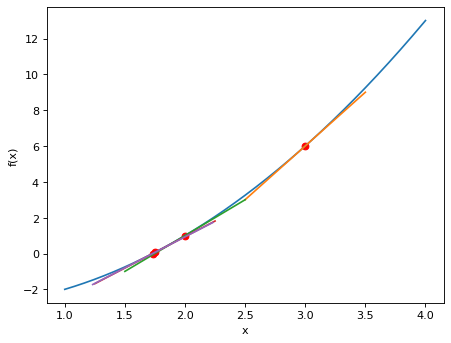

1

In [24]:
from matplotlib import pyplot
from IPython import display
import time

class Solution:
  def mySqrt(self, m):
    self.m = m
    pyplot.figure(dpi=80)
    pyplot.xlabel('x'); pyplot.ylabel('f(x)')
    self.update_display_flag = False
    if m == 0:
      return 0
    e = 0.01
    last = -100
    cur = m
    while abs(cur-last) > e:
      self.updateDisplay(cur)
      time.sleep(1)
      last = cur
      cur = (cur*cur + m)/(2*cur)
    pyplot.close()
    return int(cur)

  def updateDisplay(self, x0):
    x = []
    y1 = []
    y2 = []
    if self.update_display_flag == False:
      cur = self.m - 2
      while cur < self.m + 1:
        cur += 0.001
        x.append(cur)
        y1.append(cur*cur-self.m)
      pyplot.plot(x, y1)
    x = []
    cur = x0 - 0.5
    while cur < x0 + 0.5:
      cur += 0.001
      x.append(cur)
      y2.append(2*x0*cur - x0*x0 - self.m)
    pyplot.plot(x, y2)
    pyplot.scatter(x0, x0*x0 - self.m, color="red")
    if self.update_display_flag == False:
      display.display(pyplot.gcf(), display_id='fig1')
      self.update_display_flag = True
    else:
      display.update_display(pyplot.gcf(), display_id='fig1')

Solution().mySqrt(3)
    